In [2]:
import librosa
import librosa.filters
import numpy as np
from scipy import signal
import math
import os
import torch

import matplotlib
import matplotlib.pyplot as plt

from ..stts import audio
import stts.audio_torch
import util
import ljspeech
from torch.utils.data import Dataset, DataLoader


ValueError: attempted relative import beyond top-level package

In [2]:
dir_base = './LJSpeech-1.1'
dir_train = os.path.join(dir_base, 'train')
dir_val = os.path.join(dir_base, 'val')
dir_wav = os.path.join(dir_base, 'wavs')
dir_train_spec = os.path.join(dir_train, 'spec')
dir_train_mel = os.path.join(dir_train, 'mel')
dir_val_spec = os.path.join(dir_val, 'spec')
dir_val_mel = os.path.join(dir_val, 'mel')

if not os.path.exists(dir_train):
    os.mkdir(dir_train)
if not os.path.exists(dir_val):
    os.mkdir(dir_val)


meta_path = os.path.join(dir_base, 'metadata.csv')
meta_path_train = os.path.join(dir_train, 'meta.txt')
meta_path_val = os.path.join(dir_val, 'meta.txt')

In [3]:
train_meta, val_meta = ljspeech.read_metadata(meta_path, dir_wav)
len(train_meta), len(val_meta)

(10480, 2620)

In [6]:
ljspeech.process_wavfiles(train_meta, meta_path_train, dir_train_spec, dir_train_mel)

100%|██████████| 10480/10480 [09:45<00:00, 17.89it/s]


In [4]:
ljspeech.process_wavfiles(val_meta, meta_path_val, dir_val_spec, dir_val_mel)

100%|██████████| 2620/2620 [02:07<00:00, 20.54it/s]


In [3]:
ds = ljspeech.LJDataset(meta_path_val)

In [4]:
dl = DataLoader(ds, batch_size=16, collate_fn=ds.collate)

In [5]:
it = iter(dl)

In [6]:
batch = next(it)

In [8]:
spec = np.load(spec_path)

In [9]:
def plot_spectrogram(spec, name="", colorbar=False, log_dir=None):
    fig, ax = plt.subplots()
    im = ax.imshow(np.flip(spec, 0), cmap='jet', aspect=0.2 * spec.shape[1] / spec.shape[0])
    if colorbar:
        fig.colorbar(im)
    plt.title(name)    
    if log_dir is not None and not os.path.exists(dir):
        os.mkdir(log_dir)
        if len(name) > 0:
            plt.savefig(os.path.join(log_dir, name + '.png', format='png'))

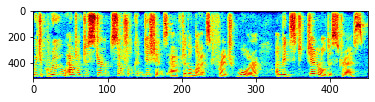

In [11]:
plot_spectrogram(spec)
plt.show()

In [14]:
batch['idx'][1]

tensor(1)

In [8]:
mag, angle = stft.transform(torch.FloatTensor(wav).view(1, -1))

In [11]:
mag = mag.squeeze(0)

In [13]:
mag.mean(), spec.mean()

(tensor(0.3877), 0.2666865)

In [14]:
mag.max(), spec.max()

(tensor(123.7461), 0.9609058)

In [20]:
lmag = torch.log(mag ** 2)

In [21]:
lmag.mean()

tensor(-6.5666)

In [19]:
mag.mean()

tensor(0.3877)

In [23]:
'akhdg'.endswith('')

True

In [24]:
meta = './metadata.csv'

In [26]:
with open(meta, 'r') as f:
    lines = f.readlines()

In [35]:
lines[0].split('|')[-1]

'Printing, in the only sense with which we are at present concerned, differs from most if not from all the arts and crafts represented in the Exhibition\n'

In [36]:
len(lines)

13100

In [3]:
math.ceil(5/3)

2

In [1]:
a = [1,2,3,4,5]
a[[3,4,5]]

TypeError: list indices must be integers or slices, not list

In [2]:
str(None)

'None'

In [3]:
import os

In [4]:
os.path.join('..' , os.getcwd())

'/home/dhlee/Workplace/torch_datasets/ljspeech'

In [5]:
os.getcwd()


'/home/dhlee/Workplace/torch_datasets/ljspeech'

In [6]:
os.path.join(os.getcwd(), '..')

'/home/dhlee/Workplace/torch_datasets/ljspeech/..'

In [7]:
os.listdir(os.path.join(os.getcwd(), '..'))

['.gitmodules', 'README.md', '.git', 'stts', 'ljspeech', '__init__.py']

In [9]:
os.path.join('..', '..')

'../..'

In [10]:
[c for c in 'akldgjhqdg']

['a', 'k', 'l', 'd', 'g', 'j', 'h', 'q', 'd', 'g']

In [11]:
import re
_abbreviations = [(re.compile('\\b%s\\.' % x[0], re.IGNORECASE), x[1]) for x in [
  ('mrs', 'misess'),
  ('mr', 'mister'),
  ('dr', 'doctor'),
  ('st', 'saint'),
  ('co', 'company'),
  ('jr', 'junior'),
  ('maj', 'major'),
  ('gen', 'general'),
  ('drs', 'doctors'),
  ('rev', 'reverend'),
  ('lt', 'lieutenant'),
  ('hon', 'honorable'),
  ('sgt', 'sergeant'),
  ('capt', 'captain'),
  ('esq', 'esquire'),
  ('ltd', 'limited'),
  ('col', 'colonel'),
  ('ft', 'fort'),
]]



def expand_abbreviations(text):
    for regex, replacement in _abbreviations:
        text = re.sub(regex, replacement, text)
    return text

In [15]:
expand_abbreviations('lt. kim')

'lieutenant kim'

In [1]:
import g2p_en as G2p
import textutil

ModuleNotFoundError: No module named 'textutil'

In [18]:
g2p = G2p.G2p()

In [34]:
g2p('I am a boy,')

['AY1', ' ', 'AE1', 'M', ' ', 'AH0', ' ', 'B', 'OY1', ' ', ',']

In [36]:
from textutil import text_normalize

ModuleNotFoundError: No module named '__main__.textutil'; '__main__' is not a package